<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_09_5_illustrated_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]](https://www.youtube.com/watch?v=lcUsade04pg&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* Part 9.2: Generating Images with DALL·E Kaggle Notebooks [[Video]](https://www.youtube.com/watch?v=CBfT1y1V1e0&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* Part 9.3: DALL·E Existing Images [[Video]](https://youtube.com/watch?v=5gdaXrJs3Kk&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* Part 9.4: MultiModal Models [[Video]](https://www.youtube.com/watch?v=rYlj9t_wlFA&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* **Part 9.5: Illustrated Book** [[Video]](https://www.youtube.com/watch?v=TTGen7P3ScU&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [1]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain langchain_openai langchain_community pypdf pdfkit wkhtmltopdf
    !apt-get install wkhtmltopdf
    !pip install langchain langchain_openai
    !pip install openai pandas langchain
    !pip install --upgrade langchain openai

Note: using Google CoLab
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.


# 3.5: LLM Writes a Book

In a previous module, we built an LLM-based book generator that automated the creation of a book from start to finish. This process included generating a synopsis, outlining the table of contents, and then iteratively writing the chapters into a structured markdown document. Now, we will expand on that work by incorporating DALLE to generate a cover image for the book, adding a visual element to complement the text-based content.

We begin by accessing a large language model with a temperature of 0.7. We use a higher temperature to encourage creativity.

In [2]:
   !pip install --upgrade langchain langchain_openai openai

In [3]:
import openai
import langchain_openai
import langchain

print("OpenAI version:", openai.__version__)
print("LangChain version:", langchain.__version__)
!pip install --upgrade langchain
import langchain
print("LangChain version:", langchain.__version__)


OpenAI version: 1.57.0
LangChain version: 0.3.10
LangChain version: 0.3.10


In [4]:
from langchain.chains.summarize import load_summarize_chain
from langchain import OpenAI, PromptTemplate
from IPython.display import display_markdown
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4",  # Replace with the correct model name
    temperature=0.7
)


<ipython-input-4-f09976216f52>:6: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


We create a simple utility function to query the LLM with a custom system prompt. The system prompt tells the LLM that it is assisting in creating a book.

In [5]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)
from langchain_openai import ChatOpenAI

def query_llm(prompt):
  messages = [
      SystemMessage(
          content="You are assistant helping to write a book."
      ),
      HumanMessage(
          content=prompt
      ),
  ]

  output = llm.invoke(messages)
  return output.content



In this section, we will expand the functionality of our LLM-based book generator by adding a visual component: a cover image for the book. While our previous work focused on generating a complete markdown document containing the book’s synopsis, table of contents, and chapters, this enhancement introduces the power of DALLE to generate a custom cover image based on the content of the book.

The function render_dalle3 has been added to accomplish this. By leveraging the OpenAI API, we will generate an image using DALLE 3 based on a given prompt, which could be the title or a descriptive aspect of the book. This image is created at the required resolution of 1024x1024 pixels and can be resized to fit any custom dimensions specified by the user. The generated cover image will be saved as a JPEG file, and optionally, it can be displayed using the Python matplotlib library.

This feature not only enriches the generated book with a professional cover but also demonstrates the seamless integration of text and image generation, making the book creation process even more comprehensive and visually appealing.

In [6]:
import io
import requests
from PIL import Image
import matplotlib.pyplot as plt
from openai import OpenAI

def render_dalle3(prompt, filename, height, width):
    # Initialize the OpenAI client
    client = OpenAI()

    # Generate the image using DALL-E 3 at the required 1024x1024 resolution
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",  # DALL-E 3 requires 1024x1024
        quality="standard",
        n=1,
    )

    # Get the image URL from the response
    image_url = response.data[0].url

    # Fetch the image content from the URL
    response2 = requests.get(image_url)
    img = Image.open(io.BytesIO(response2.content))

    # Resize the image to the requested dimensions (height x width)
    img_resized = img.resize((width, height), Image.LANCZOS)

    # Save the resized image
    img_resized.save(filename, "JPEG")

    # Optionally display the resized image
    plt.imshow(img_resized)
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.show()

    return img_resized


## Generate Title, Synopsis and Table of Contents

For this book, we allow the user to specify the subject specified by the SUBJECT variable. We then request the LLM to generate a random title based on this subject. It is essential that the prompt request that the LLM only the; LLMs often like to prefix with text such as "Here is a random title."

In [7]:
SUBJECT = "international spy thriller"

title = query_llm(f"""
Give me a random title for a book on the subject '{SUBJECT}'.
Return only the title, no additional text.
""").strip(" '\"")
print(title)

Shadows Across Borders: A Web of Espionage


Now that we have a title, we can request a random synopsis of the book.

In [8]:
synopsis = query_llm(f"""
Give me a synopsis for a book of the title '{SUBJECT}' for a book on the subject '{SUBJECT}'.
Return only the synopsis, no additional text.
""").strip(" '\"")
print(synopsis)

In the heart-stopping international spy thriller, "Web of Deceit", we follow the journey of veteran MI6 agent, Alex Turner. Turner, a man haunted by his past, is pulled back into the world of espionage when a mysterious encrypted message is intercepted, hinting at a global catastrophe. As Turner navigates through the shadowy underworld of international spies, he must decipher the cryptic clues left behind by an elusive informant known only as "Nightingale". The stakes are raised when Turner discovers a sinister plot involving rogue agents across various intelligence agencies, intending to trigger a third world war. Struggling against time and betrayal at every turn, Turner must use his razor-sharp instincts, advanced gadgetry, and exceptional combat skills to unravel the truth and stop the impending doom. In this high-voltage game of cat and mouse, Turner not only fights for global peace but also battles his own demons. 'Web of Deceit' is an electrifying tale of secrets, betrayal, and 

Next, we generate the table of contents. For this generation, we provide all previous information. We also request a particular format for the table of contents. You may notice that I ask for the chapter numbers, even though they are an increasing numeric count and could easily be derived. This process works better because the LLM wants to provide the chapter numbers, and attempts to suppress chapter numbers are often inconsistent. It is easier to allow the LLM to generate chapter numbers but control where it generates them so that I can consistently remove them later.

Cover prompt: On the cover, a silhouetted figure stands against a backdrop of a world map awash in a web of interconnected lines, representing various intelligence agencies. The figure is holding a glowing gadget, symbolizing advanced technology and encrypted messages, while a shadowy bird - the Nightingale - is subtly incorporated into the web, symbolizing the elusive informant. The title 'Web of Deceit' is embossed in silver, hinting at the chilly and perilous journey ahead.


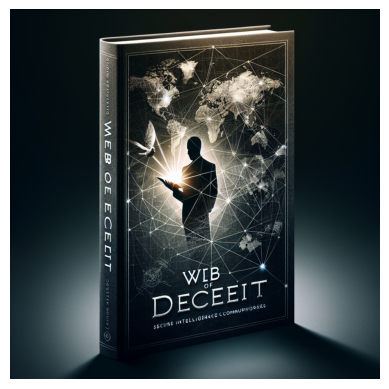

In [9]:
cover_prompt = query_llm(f"Give me a stable diffusion prompt for the cover of a book with the following synopsis:"
                         f"Return only the prompt, no extra text."
                f"{synopsis}")
print(f"Cover prompt: {cover_prompt}")
# Get the current working directory
current_directory = os.getcwd()
# Combine the directory with the file name to get the absolute path
file_path = os.path.join(current_directory, "cover.jpg")
image = render_dalle3(cover_prompt, file_path, 768, 768)

In [10]:
toc = query_llm(f"""
Give me a table of contents for a book of the title '{title}' for a book on
the subject '{SUBJECT}' the book synopsis is '{synopsis}'.
Return the table of contents as a list of chapter titles.
Separate the chapter number and chapter title with a pipe character '|'.
Return only the chapter names, no additional text.
""").strip(" '\"")
print(toc)

1. | Prologue: The Haunted Past
2. | The Mysterious Message
3. | Return to the Shadows
4. | Deciphering Nightingale's Clues
5. | Underworld of Spies
6. | The Rogue Agents’ Game
7. | The Sinister Plot Unveiled
8. | Countdown to Catastrophe
9. | The High-Tech Arsenal
10. | The Art of Combat
11. | Betrayal in the Ranks
12. | The Race Against Time
13. | The Deadly Encounter
14. | Unraveling the Web
15. | The Battle Within
16. | The Final Showdown
17. | Epilogue: Peace and Redemption


We must now parse the table of contents and remove the pipes and chapter numbers.

In [11]:
# Split the string into lines
lines = toc.splitlines()

# Extract titles using list comprehension
toc2 = [line.split('|')[1].strip() for line in lines if line]

# Print the list of titles
print(toc2)

['Prologue: The Haunted Past', 'The Mysterious Message', 'Return to the Shadows', "Deciphering Nightingale's Clues", 'Underworld of Spies', 'The Rogue Agents’ Game', 'The Sinister Plot Unveiled', 'Countdown to Catastrophe', 'The High-Tech Arsenal', 'The Art of Combat', 'Betrayal in the Ranks', 'The Race Against Time', 'The Deadly Encounter', 'Unraveling the Web', 'The Battle Within', 'The Final Showdown', 'Epilogue: Peace and Redemption']


## Generate the Chapters of the Book

Next, we create a function capable of producing the text that makes up a chapter. To ensure that the function has enough context to generate each chapter, we provide the synopsis, the table of contents, and the chapter number. To test this code, we request that it develop a single chapter.

In [12]:
def render_chapter(num, chapter_title, title, subject, synopsis, toc):
  txt = query_llm(f"""
  Write Chapter {num}, titled "{chapter_title}" for a book of the title '{title}' for a book on
  the subject '{subject}' the book synopsis is '{synopsis}' the table of contents is '{toc}'.
  Give me only the chapter text, no chapter heading, no chapter title, number, no additional text.
  """).strip(" '\"")
  return txt

txt = render_chapter(1, toc2[0], title, SUBJECT, synopsis, toc)
print(txt)

Dusk was setting in over London as Alex Turner sat alone in his quiet, dimly lit apartment, nursing a drink. His eyes, no longer youthful but still sharp and alert, stared blankly at the trail of condensation left by the glass on the antique wooden table. The silence of the room was only broken by the soft ticking of the grandfather clock, its rhythmic sound a testament to the passing time.

But time, for Turner, was a cruel reminder of his past. The past that was filled with the shadows of espionage, a past that he had tried to bury deep within himself, yet it kept resurfacing, like a vengeful ghost refusing to rest.

As he drowned himself in the amber liquid, his mind wandered off to the days of his youth. The days when he was an MI6 operative, fearlessly stepping into the darkest corners of the world, protecting his land and its people from unseen threats. It was a dangerous and treacherous life, but it was a life he had chosen. A life that had cost him everything he held dear.

His

We can now generate the entire book in Markdown, which allows some formatting. We begin by rendering the title and synopsis, the table of contents, and each chapter.

In [13]:
import base64

book = ""

# Render the title
book += f"# {title}\n"

# Read and encode the image as base64
with open(file_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

# Render the book cover
book = f"# {title}\n<img src='data:image/jpeg;base64,{encoded_string}' alt='title'>\n\n"
book += f"## Synopsis\n\n{synopsis}\n\n"

# Render the toc
book += f"\n## Table of Contents\n\n"
num = 1
for chapter_title in toc2:
  book += f"{num}. {chapter_title}\n"
  num += 1


# Render the book
chapter = 1
for chapter_title in toc2:
  print(f"Rendering chapter {chapter}/{len(toc2)}: {chapter_title}")
  txt = render_chapter(chapter, chapter_title, title, SUBJECT, synopsis, toc)
  book += f"\n\n## Chapter {chapter}: {chapter_title}\n"
  book += f"{txt}\n"
  chapter += 1


Rendering chapter 1/17: Prologue: The Haunted Past
Rendering chapter 2/17: The Mysterious Message
Rendering chapter 3/17: Return to the Shadows
Rendering chapter 4/17: Deciphering Nightingale's Clues
Rendering chapter 5/17: Underworld of Spies
Rendering chapter 6/17: The Rogue Agents’ Game
Rendering chapter 7/17: The Sinister Plot Unveiled
Rendering chapter 8/17: Countdown to Catastrophe
Rendering chapter 9/17: The High-Tech Arsenal
Rendering chapter 10/17: The Art of Combat
Rendering chapter 11/17: Betrayal in the Ranks
Rendering chapter 12/17: The Race Against Time
Rendering chapter 13/17: The Deadly Encounter
Rendering chapter 14/17: Unraveling the Web
Rendering chapter 15/17: The Battle Within
Rendering chapter 16/17: The Final Showdown
Rendering chapter 17/17: Epilogue: Peace and Redemption


## Generate a PDF of the Book

Now that we have generated the book, we have saved it as a PDF.

In [14]:
import markdown
import pdfkit

# Convert Markdown to HTML
html = markdown.markdown(book)
options = {
    'encoding': "UTF-8",  # Ensures UTF-8 encoding
}

pdfkit.from_string(html, 'output.pdf', options=options)

True

We can now download the generated book.

In [15]:
from google.colab import files
files.download("output.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>